In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
data_transform = transforms.Compose([
        transforms.Resize((300,300)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [3]:
train_dataset = datasets.ImageFolder(root='../novel-data/train',
                                           transform=data_transform)
train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=10, shuffle=True,
                                             num_workers=4)
test_dataset = datasets.ImageFolder(root='../novel-data/test',
                                           transform=data_transform)
test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size=140, shuffle=True,
                                             num_workers=4)
test_x, test_y = next(iter(test_dataset_loader))
test_x, test_y = Variable(test_x), Variable(test_y)

['person1', 'person10', 'person11', 'person12', 'person13', 'person14', 'person2', 'person3', 'person4', 'person5', 'person6', 'person7', 'person8', 'person9']


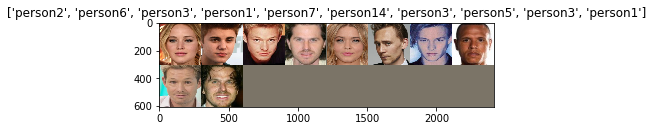

In [19]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

inputs, classes = next(iter(train_dataset_loader))
class_names = train_dataset.classes
print(class_names)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 34 * 34, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 14)
        self.dropout = nn.Dropout2d(p=0.3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
        #print(x.shape)
        x = x.view(-1, 32 * 34 * 34)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
def calc_accuracy(mdl,X,Y):
    # TODO: why can't we call .data.numpy() for train_acc as a whole?
    max_vals, max_indices = torch.max(mdl(X),1)
    train_acc = (max_indices == Y).sum().data.numpy()/max_indices.size()[0]
    return train_acc

In [6]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=1e-3)

In [7]:
for epoch in range(10):  # loop over the dataset multiple times
    acc = 0
    running_loss = 0.0
    test_acc = 0
    train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=10, shuffle=True)
    
    for i, data in enumerate(train_dataset_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        acc += calc_accuracy(net, inputs, labels)
        # print statistics
        running_loss += loss.data[0]
        #if i % 5 == 4:    # print every 2000 mini-batches
            #print('[%d, %5d] loss: %.3f' %
            #      (epoch + 1, i + 1, running_loss / 5))
        #    running_loss = 0.0
        
    # Compute test accuracy
    test_acc += calc_accuracy(net, test_x, test_y)

    print('Loss: ', running_loss)
    print('Training accuracy: ', acc/(len(train_dataset_loader)))
    print('Test accuracy: ', test_acc)

print('Finished Training')

Loss:  119.25476187467575
Training accuracy:  [0.71285714]
Test accuracy:  [0.4028777]
Loss:  45.60819400846958
Training accuracy:  [0.93714286]
Test accuracy:  [0.48920863]
Loss:  26.55194954201579
Training accuracy:  [0.97714286]
Test accuracy:  [0.52517986]
Loss:  15.764235747046769
Training accuracy:  [0.99142857]
Test accuracy:  [0.60431655]
Loss:  11.108927730470896
Training accuracy:  [0.99714286]
Test accuracy:  [0.61151079]
Loss:  6.783154628705233
Training accuracy:  [1.]
Test accuracy:  [0.63309353]
Loss:  4.211920388421277
Training accuracy:  [1.]
Test accuracy:  [0.65467626]
Loss:  3.1301249483949505
Training accuracy:  [1.]
Test accuracy:  [0.63309353]
Loss:  2.040154091315344
Training accuracy:  [1.]
Test accuracy:  [0.62589928]
Loss:  1.4368422388797626
Training accuracy:  [1.]
Test accuracy:  [0.61870504]
Finished Training
